In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import *

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('churn_analysis.csv')

In [4]:
df.head()

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,1,OH,107,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,2,NJ,137,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,4,OK,75,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


### 1

In [97]:
df_control = df[df.treatment == 1][['state','churn']]

In [98]:
import itertools
pairs = []
for i in itertools.combinations(df_1['state'].unique(), r=2):
    pairs.append(i)

In [108]:
pd.crosstab(df_control.state.where(df_control.state.isin(pairs[0])), df_control.churn)

churn,False.,True.
state,,
KS,18,7
OH,22,2


In [109]:
from scipy.stats import chi2_contingency

In [132]:
chi2_list_without = []
for pair in pairs:
    con_df = pd.crosstab(df_control.state.where(df_control.state.isin(pair)), df_control.churn)
    chi2_list_without.append(chi2_contingency(con_df, correction = False)[1])

In [134]:
print sum(i < 0.05 for i in chi2_list_without)
print np.array(chi2_list_without).mean()

34
0.5018273798739158


/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


### 2

In [136]:
chi2_list_with = []
for pair in pairs:
    con_df = pd.crosstab(df_control.state.where(df_control.state.isin(pair)), df_control.churn)
    chi2_list_with.append(chi2_contingency(con_df, correction = True)[1])

In [137]:
print sum(i < 0.05 for i in chi2_list_with)
print np.array(chi2_list_with).mean()

0
0.6640566382051047


/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


### 3

In [125]:
from scipy.stats import fisher_exact

In [138]:
fisher_list = []
for pair in pairs:
    con_df = pd.crosstab(df_control.state.where(df_control.state.isin(pair)), df_control.churn)
    fisher_list.append(fisher_exact(con_df)[1])

In [139]:
print sum(i < 0.05 for i in fisher_list)
print np.array(fisher_list).mean()

10
0.6483383060020681


/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


### 4

In [143]:
from scipy.stats.stats import pearsonr

In [144]:
pearsonr(df.day_calls, df.mes_estim)

(-0.051794350587572625, 0.0027798836869756707)

### 5

In [145]:
from scipy.stats import spearmanr

In [146]:
spearmanr(df.day_calls, df.mes_estim)

SpearmanrResult(correlation=0.043349880533927444, pvalue=0.012317367189170541)

### 6

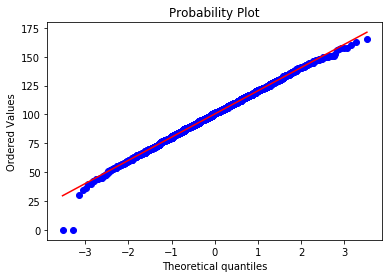

In [148]:
stats.probplot(df.day_calls, dist="norm", plot=pylab)
pylab.show()

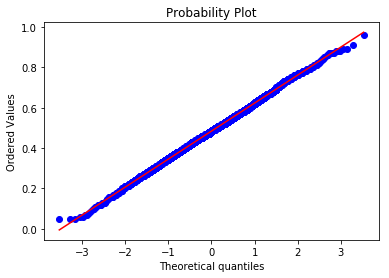

In [149]:
stats.probplot(df.mes_estim, dist="norm", plot=pylab)
pylab.show()

(array([2.000e+00, 1.000e+00, 1.900e+01, 1.160e+02, 4.690e+02, 9.170e+02,
        1.055e+03, 5.540e+02, 1.790e+02, 2.100e+01]),
 array([  0. ,  16.5,  33. ,  49.5,  66. ,  82.5,  99. , 115.5, 132. ,
        148.5, 165. ]),
 <a list of 10 Patch objects>)

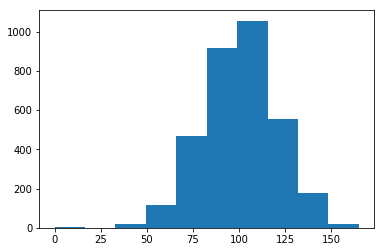

In [152]:
plt.hist(df.day_calls)

(array([ 25.,  99., 288., 604., 859., 775., 433., 192.,  47.,  11.]),
 array([0.05 , 0.141, 0.232, 0.323, 0.414, 0.505, 0.596, 0.687, 0.778,
        0.869, 0.96 ]),
 <a list of 10 Patch objects>)

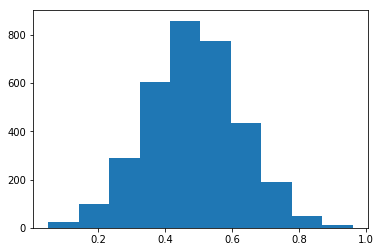

In [153]:
plt.hist(df.mes_estim)

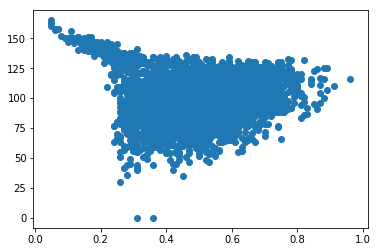

In [155]:
plt.scatter(df.mes_estim, df.day_calls, )

### 7

In [173]:
methodl = df[df.treatment == 1].churn
method0 = df[df.treatment == 0].churn
method2 = df[df.treatment == 2].churn

In [174]:
stats.mannwhitneyu(method0, methodl)

MannwhitneyuResult(statistic=609983.0, pvalue=0.11422789726970456)

In [175]:
stats.mannwhitneyu(method2, methodl)

MannwhitneyuResult(statistic=581418.5, pvalue=0.004682843909516251)

In [176]:
stats.mannwhitneyu(method0, method2)

MannwhitneyuResult(statistic=612029.0, pvalue=0.0782667531519737)